In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from ipywidgets import IntProgress

from bp import *
from lattice import *

%load_ext autoreload
%autoreload 2

# Belief Propagation

In [2]:
h, w = 100, 100

J = 0.5
B = -0.001
beta = 10

n_steps = 500

In [3]:
unary_potential = beta * B * np.array([-1, 1])
pairwise_potential = beta * J * np.outer([-1, 1], [-1, 1])
unary_log_messages = np.zeros((h, w, 4, 2)) # U, D, L, R
col_pairwise_log_messages = np.zeros((h-1, w, 2, 2)) # U, D
row_pairwise_log_messages = np.zeros((h, w-1, 2, 2)) # L, R

In [4]:
step(h, w, unary_potential, pairwise_potential, unary_log_messages, col_pairwise_log_messages, row_pairwise_log_messages)

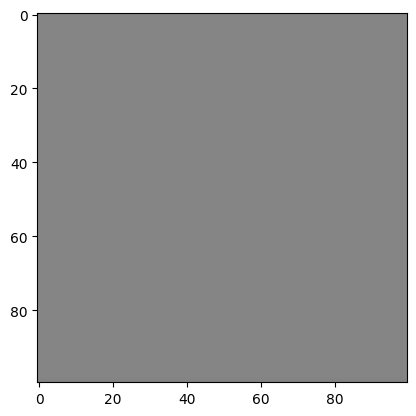

In [5]:
beliefs = np.empty((h, w, 2))

for i in range(h):
    for j in range(w):
        prod = unary_potential + np.sum(unary_log_messages[i, j], axis=0)
        beliefs[i, j] = np.exp(prod)

plt.imshow(beliefs[:, :, 1]/np.sum(beliefs, axis=2), 'binary', vmin=0, vmax=1)

In [10]:
unary_log_messages[-1, -1]

array([[5.0100454, 4.9900454],
       [0.       , 0.       ],
       [0.       , 0.       ],
       [5.0100454, 4.9900454]])